## Toronto neighborhoods clustering

In this Notebook you will see the Toronto neighborhoods clustering using the neighborhoods latitude and longitude to find the top venues on the zone

In [7]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim 
from lxml import html
import requests
import re

#### Getting the resources setup

In [8]:
page = requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Toronto')

In [9]:
tree = html.document_fromstring(page.content)

In [10]:
boroughs_data = tree.cssselect('h3>span')
neigh_data = tree.cssselect('table>tbody>tr>td>ul>li')
num_of_neigh = [88]

In [11]:
# No. of Neighbourhoods on each boroughs
boroughs = {'Old Toronto': 89, 'East York': 10, 'Etobicoke': 28, 'North York': 38,'Scarborough': 33,'York': 13}
keys = list(boroughs.keys())

#### Creating a dataframe with the boroughs, neighborhoods and empty latitude and longitude columns

In [22]:
neigh_df = pd.DataFrame()
#for nb in num_of_neigh[0]:

def neigh(data):
    neighs = []
    for d in data:
       neighs.append(d.text_content()) 
    return neighs

neigh_df['Neighborhood'] = neigh(neigh_data)
neigh_df.head()
#neigh_df['Borough']
#neigh_df[:89]['Borough'] = 'Old Toronto'
i = 0
neigh_df['Borough'] = np.nan
neigh_df['Latitude'] = np.nan
neigh_df['Longitude'] = np.nan

while i < len(neigh_df):
    if(i < boroughs[keys[0]]):
        neigh_df['Borough'][i] = keys[0]
    elif(i > boroughs[keys[0]]-1 and i < boroughs[keys[0]] + boroughs[keys[1]]):
        neigh_df['Borough'][i] = keys[1]
    elif(i > boroughs[keys[0]] + boroughs[keys[1]] - 1 and i < boroughs[keys[0]] + boroughs[keys[1]]  + boroughs[keys[2]]):
        neigh_df['Borough'][i] = keys[2]
    elif(i > boroughs[keys[0]] + boroughs[keys[1]] + boroughs[keys[2]] - 1 and i < boroughs[keys[0]] + boroughs[keys[1]]  + boroughs[keys[2]] + boroughs[keys[3]]):
        neigh_df['Borough'][i] = keys[3]
    elif(i > boroughs[keys[0]] + boroughs[keys[1]] + boroughs[keys[2]] + boroughs[keys[3]] - 1 and i < boroughs[keys[0]] + boroughs[keys[1]]  + boroughs[keys[2]] + boroughs[keys[3]] + boroughs[keys[4]]):
        neigh_df['Borough'][i] = keys[4]
    elif(i > boroughs[keys[0]] + boroughs[keys[1]] + boroughs[keys[2]] + boroughs[keys[3]] + boroughs[keys[4]] - 1 and i < boroughs[keys[0]] + boroughs[keys[1]]  + boroughs[keys[2]] + boroughs[keys[3]] + boroughs[keys[4]] + boroughs[keys[5]]):
        neigh_df['Borough'][i] = keys[5]
    i += 1

    
#list(neigh_df.shape)[0]
neigh_df.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

,Neighborhood,Borough,Latitude,Longitude
0,Alexandra Park,Old Toronto,NaN,NaN
1,The Annex,Old Toronto,NaN,NaN
2,Baldwin Village,Old Toronto,NaN,NaN
3,Cabbagetown,Old Toronto,NaN,NaN
4,CityPlace,Old Toronto,NaN,NaN


Getting the latitude and longitude for each Neighborhood row. I'm using __geopy__ Nominatim

In [24]:
def cleanText(text):
    regex = re.compile('\(.+?\)')
    regex2 = re.compile('\[.+?\]')
    text = regex2.sub('',regex.sub('',text))
    return text

def getCoords(address):
    address = cleanText(address)
    try:
        address = list(Nominatim(user_agent='my-application').geocode('{}, Toronto, Ontario, Canada'.format(address)))[-1]
    except:
        address = (np.nan,np.nan)
    return address
        
long_lat = neigh_df['Neighborhood'][:211].apply(lambda x: getCoords(x))



In [25]:
#neigh_df['Latitude'] = neigh_df['Latitude'].apply()long_lat[0]
import math
#math.isnan(float('nan'))
neigh_df['Latitude'] = long_lat[:211].apply(lambda x: np.nan if math.isnan(x[0]) else x[0])
#long_lat[:211]

In [26]:
neigh_df['Longitude'] = long_lat[:211].apply(lambda x: np.nan if math.isnan(x[1]) else x[1])

In [27]:
neigh_df.head()

,Neighborhood,Borough,Latitude,Longitude
0,Alexandra Park,Old Toronto,43.650758,-79.404298
1,The Annex,Old Toronto,43.670338,-79.407117
2,Baldwin Village,Old Toronto,43.669818,-79.497172
3,Cabbagetown,Old Toronto,43.664473,-79.366986
4,CityPlace,Old Toronto,43.639248,-79.396387


I'm droping every row with __NaN__s 

In [28]:
toronto_neighb = neigh_df.dropna()

In [29]:
toronto_neighb.head()

,Neighborhood,Borough,Latitude,Longitude
0,Alexandra Park,Old Toronto,43.650758,-79.404298
1,The Annex,Old Toronto,43.670338,-79.407117
2,Baldwin Village,Old Toronto,43.669818,-79.497172
3,Cabbagetown,Old Toronto,43.664473,-79.366986
4,CityPlace,Old Toronto,43.639248,-79.396387


Getting the main latitude and longitude for the map

In [30]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


Function that gets Foursquare data

In [31]:
RADIUS = 500 
LIMIT = 100
CLIENT_ID = 'LEOE4LM4RHRHZYYVCXRTYY5XLUBBKHZMEOAM42KN50ATXWAH'
CLIENT_SECRET = 'STKIXKKRK3FJ4BNLEJ4E55YZ0A4IMSF35GMVMSCRJAU4E4JN'
VERSION = '20190203' 

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
toronto_venues = getNearbyVenues(names=toronto_neighb['Neighborhood'],
                                   latitudes=toronto_neighb['Latitude'],
                                   longitudes=toronto_neighb['Longitude']
                                  )


Alexandra Park
The Annex
Baldwin Village
Cabbagetown
CityPlace
Chinatown
Church and Wellesley
Corktown
Discovery District
Distillery District
The Entertainment District
Fashion District
Financial District
Garden District
Grange Park
Harbord Village
Harbourfront
Kensington Market
Moss Park
Old Town
Quayside
Queen Street West
Regent Park
South Core
St. James Town
St. Lawrence
Toronto Islands
Trefann Court
University (includes Huron–Sussex)
Yorkville
The Beaches (also known as The Beach)
East Danforth
Gerrard Street East (Gerrard India Bazaar)
Leslieville
Main Square
Port Lands
Riverdale
Upper Beaches
Bedford Park
Casa Loma
Chaplin Estates
Davisville Village
Deer Park (Yonge and St. Clair)
Forest Hill (and Forest Hill Village)
Lawrence Park
Lytton Park
Midtown
Moore Park
North Toronto
Rosedale
South Hill (includes Rathnelly)
Summerhill
Wanless Park
Wychwood Park
Yonge–Eglinton (considered centre of Midtown Toronto)
Beaconsfield Village
Bloor West Village
Bracondale Hill
Brockton Village
C

In [33]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alexandra Park,43.650758,-79.404298,Buddha's Vegetarian,43.651904,-79.403312,Vegetarian / Vegan Restaurant
1,Alexandra Park,43.650758,-79.404298,Kanto,43.652167,-79.404843,Filipino Restaurant
2,Alexandra Park,43.650758,-79.404298,Alexandra Park,43.650583,-79.404538,Park
3,Alexandra Park,43.650758,-79.404298,Market 707,43.652128,-79.404844,Food Court
4,Alexandra Park,43.650758,-79.404298,Montauk,43.652084,-79.406898,Bar


In [34]:
toronto_venues = toronto_venues.rename(columns={'Neighbourhood':'Neighborhood'})
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,11,11,11,11,11,11
Alderwood,9,9,9,9,9,9
Alexandra Park,100,100,100,100,100,100
Amesbury,4,4,4,4,4,4
Armadale,15,15,15,15,15,15
Armour Heights,3,3,3,3,3,3
Baby Point,4,4,4,4,4,4
Baldwin Village,6,6,6,6,6,6
Bathurst Manor,4,4,4,4,4,4


In [35]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

#del toronto_onehot['Neighborhood']

toronto_onehot.head()

,Zoo,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Zoo,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.00,0.090909,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.000000
1,Alderwood,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.000000
2,Alexandra Park,0.0,0.0,0.00000,0.000000,0.0,0.010000,0.0,0.0,0.000000,...,0.000000,0.00,0.000000,0.000000,0.0,0.010000,0.0,0.000000,0.00,0.010000
3,Amesbury,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.000000
4,Armadale,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.066667,0.00,0.000000
5,Armour Heights,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.000000
6,Baby Point,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.000000
7,Baldwin Village,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.000000
8,Bathurst Manor,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.000000
9,Bayview Village,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.000000


In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Top 10 venues for each Neighborhood

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Rental Car Location,Coffee Shop,Korean Restaurant,Vietnamese Restaurant,Hong Kong Restaurant,Asian Restaurant,Train Station,Cantonese Restaurant,Yoga Studio
1,Alderwood,Pizza Place,Pool,Gym,Pub,Sandwich Place,Pharmacy,Skating Rink,Coffee Shop,Yoga Studio,Farm
2,Alexandra Park,Bar,Italian Restaurant,Café,Furniture / Home Store,Coffee Shop,Restaurant,Vegetarian / Vegan Restaurant,Nightclub,Caribbean Restaurant,Filipino Restaurant
3,Amesbury,Park,Athletics & Sports,Coffee Shop,Bank,Yoga Studio,Filipino Restaurant,Exhibit,Falafel Restaurant,Farm,Farmers Market
4,Armadale,Grocery Store,Pizza Place,Burger Joint,Juice Bar,Gym,Liquor Store,Sandwich Place,Hakka Restaurant,Big Box Store,Greek Restaurant


Setting up everything for clustering and visualization 

In [39]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [40]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)


In [41]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 3, 0, 0, 1, 0, 3, 0], dtype=int32)

In [42]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_neighb

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')


In [43]:
#toronto_merged
toronto_neighb

,Neighborhood,Borough,Latitude,Longitude
0,Alexandra Park,Old Toronto,43.650758,-79.404298
1,The Annex,Old Toronto,43.670338,-79.407117
2,Baldwin Village,Old Toronto,43.669818,-79.497172
3,Cabbagetown,Old Toronto,43.664473,-79.366986
4,CityPlace,Old Toronto,43.639248,-79.396387
5,Chinatown,Old Toronto,43.652924,-79.398032
6,Church and Wellesley,Old Toronto,43.665524,-79.383801
7,Corktown,Old Toronto,43.657371,-79.356519
8,Discovery District,Old Toronto,43.657556,-79.389480
9,Distillery District,Old Toronto,43.650280,-79.359577


Making sure there are no NaN values on the dataframe

In [44]:
toronto_merged = toronto_merged.dropna()

In [49]:
toronto_merged.to_csv('toronto_data', sep=',')

Storing data into a csv file (to avoid problmes with the Foursquare resquests and Lat-Long requests)

In [51]:
toronto_data_df =  pd.read_csv('toronto_data')


In [55]:
del toronto_data_df['Unnamed: 0']

In [56]:
toronto_data_df

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandra Park,Old Toronto,43.650758,-79.404298,0.0,Bar,Italian Restaurant,Café,Furniture / Home Store,Coffee Shop,Restaurant,Vegetarian / Vegan Restaurant,Nightclub,Caribbean Restaurant,Filipino Restaurant
1,The Annex,Old Toronto,43.670338,-79.407117,0.0,Pizza Place,Coffee Shop,Grocery Store,Park,Thai Restaurant,Greek Restaurant,Ice Cream Shop,Bookstore,Metro Station,Indian Restaurant
2,Baldwin Village,Old Toronto,43.669818,-79.497172,0.0,Bakery,Grocery Store,Pizza Place,Convenience Store,Clothing Store,Bus Line,Fish & Chips Shop,Falafel Restaurant,Farm,Farmers Market
3,Cabbagetown,Old Toronto,43.664473,-79.366986,0.0,Restaurant,Café,Coffee Shop,Indian Restaurant,Italian Restaurant,Pizza Place,Beer Store,Diner,Pub,Gastropub
4,CityPlace,Old Toronto,43.639248,-79.396387,0.0,Coffee Shop,Gym,Café,Grocery Store,Pub,Park,Japanese Restaurant,Diner,French Restaurant,Sushi Restaurant
5,Chinatown,Old Toronto,43.652924,-79.398032,0.0,Café,Bar,Dessert Shop,Vietnamese Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Bakery,Mexican Restaurant,Ramen Restaurant
6,Church and Wellesley,Old Toronto,43.665524,-79.383801,0.0,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Burger Joint,Restaurant,Café,Bubble Tea Shop,Mediterranean Restaurant,Men's Store
7,Corktown,Old Toronto,43.657371,-79.356519,0.0,Coffee Shop,Pub,Park,Restaurant,Gym / Fitness Center,Hotel,Pizza Place,Thai Restaurant,Beer Store,Mediterranean Restaurant
8,Discovery District,Old Toronto,43.657556,-79.389480,0.0,Coffee Shop,Café,Chinese Restaurant,Japanese Restaurant,Art Gallery,Bubble Tea Shop,Ramen Restaurant,French Restaurant,Bar,Italian Restaurant
9,Distillery District,Old Toronto,43.650280,-79.359577,0.0,Coffee Shop,Bakery,Theater,Café,Boat or Ferry,Tech Startup,Bank,Gym Pool,Gym / Fitness Center,Pub


In [57]:
import folium
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_data_df['Latitude'], toronto_data_df['Longitude'], toronto_data_df['Neighborhood'], toronto_data_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    cluster = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

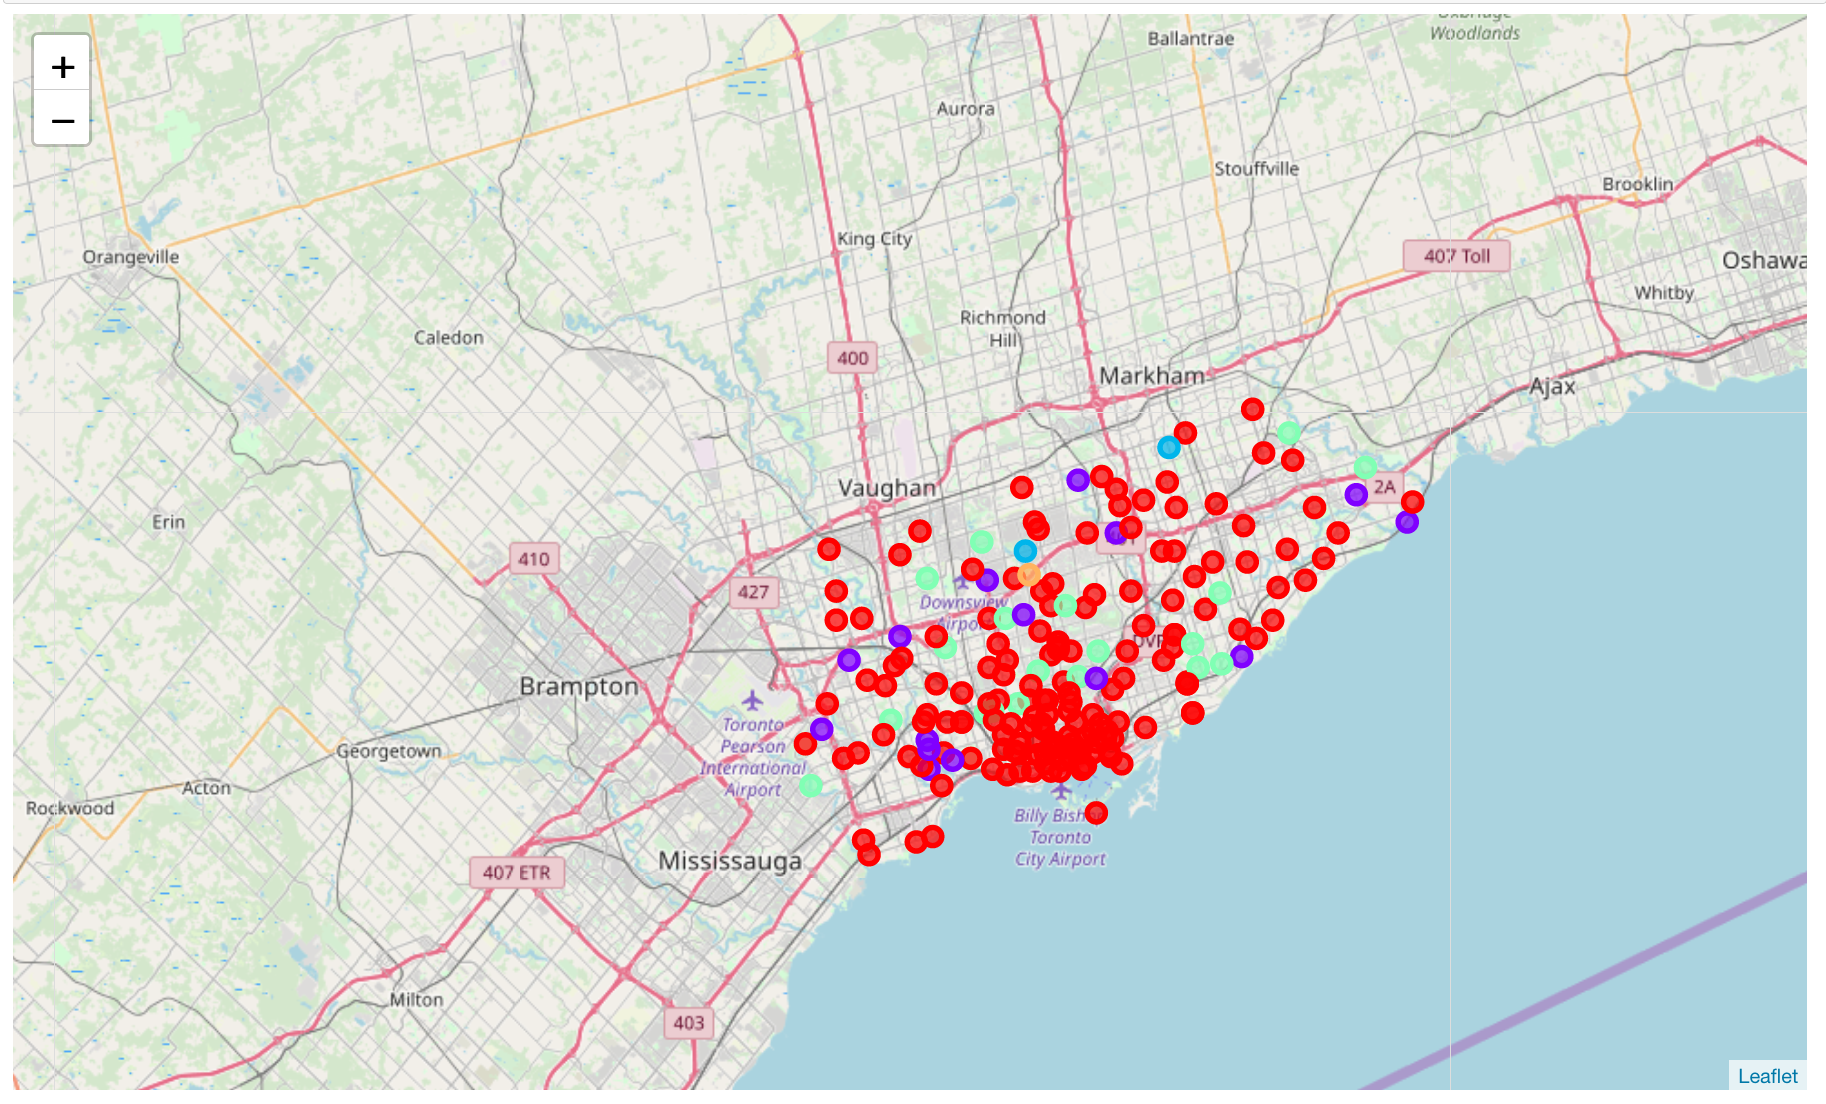

In [64]:
from IPython.display import Image
Image(filename='map.png') 

In [59]:
cluster0 = toronto_data_df.loc[toronto_data_df['Cluster Labels'] == 0, toronto_data_df.columns[[0] + list(range(5, toronto_data_df.shape[1]))]]
cluster0

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandra Park,Bar,Italian Restaurant,Café,Furniture / Home Store,Coffee Shop,Restaurant,Vegetarian / Vegan Restaurant,Nightclub,Caribbean Restaurant,Filipino Restaurant
1,The Annex,Pizza Place,Coffee Shop,Grocery Store,Park,Thai Restaurant,Greek Restaurant,Ice Cream Shop,Bookstore,Metro Station,Indian Restaurant
2,Baldwin Village,Bakery,Grocery Store,Pizza Place,Convenience Store,Clothing Store,Bus Line,Fish & Chips Shop,Falafel Restaurant,Farm,Farmers Market
3,Cabbagetown,Restaurant,Café,Coffee Shop,Indian Restaurant,Italian Restaurant,Pizza Place,Beer Store,Diner,Pub,Gastropub
4,CityPlace,Coffee Shop,Gym,Café,Grocery Store,Pub,Park,Japanese Restaurant,Diner,French Restaurant,Sushi Restaurant
5,Chinatown,Café,Bar,Dessert Shop,Vietnamese Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Bakery,Mexican Restaurant,Ramen Restaurant
6,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Burger Joint,Restaurant,Café,Bubble Tea Shop,Mediterranean Restaurant,Men's Store
7,Corktown,Coffee Shop,Pub,Park,Restaurant,Gym / Fitness Center,Hotel,Pizza Place,Thai Restaurant,Beer Store,Mediterranean Restaurant
8,Discovery District,Coffee Shop,Café,Chinese Restaurant,Japanese Restaurant,Art Gallery,Bubble Tea Shop,Ramen Restaurant,French Restaurant,Bar,Italian Restaurant
9,Distillery District,Coffee Shop,Bakery,Theater,Café,Boat or Ferry,Tech Startup,Bank,Gym Pool,Gym / Fitness Center,Pub


In [60]:
cluster1 = toronto_data_df.loc[toronto_data_df['Cluster Labels'] == 1, toronto_data_df.columns[[0] + list(range(5, toronto_data_df.shape[1]))]]
cluster1



,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
82,Swansea,Park,Dance Studio,Bus Line,Yoga Studio,Fish Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
91,Governor's Bridge,Park,Playground,Yoga Studio,Fish & Chips Shop,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
99,Eringate,Park,Yoga Studio,Fish & Chips Shop,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
100,Humber Bay,Park,Construction & Landscaping,Yoga Studio,Fish & Chips Shop,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
105,Kingsview Village (The Westway),Furniture / Home Store,Park,Fish & Chips Shop,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
123,Bayview Woods – Steeles,Park,Dog Run,Yoga Studio,Event Service,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
127,Clanton Park (Wilson Heights),Park,Gym,Yoga Studio,Filipino Restaurant,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
133,Henry Farm,Tennis Court,Park,Yoga Studio,Event Service,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
141,Ledbury Park,Park,Convenience Store,Bus Line,Yoga Studio,Fish & Chips Shop,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
148,Pelmo Park – Humberlea,Outdoors & Recreation,Park,Fish & Chips Shop,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant


In [62]:
cluster2 = toronto_data_df.loc[toronto_data_df['Cluster Labels'] == 2, toronto_data_df.columns[[0] + list(range(5, toronto_data_df.shape[1]))]]
cluster2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
138,Lansing,Health & Beauty Service,Playground,Yoga Studio,Filipino Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
181,Steeles,Playground,Yoga Studio,Fish Market,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant


In [61]:
cluster3 = toronto_data_df.loc[toronto_data_df['Cluster Labels'] == 3, toronto_data_df.columns[[0] + list(range(5, toronto_data_df.shape[1]))]]
cluster3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
43,Forest Hill (and Forest Hill Village),Bank,Accessories Store,Playground,Park,Mediterranean Restaurant,Fish & Chips Shop,Exhibit,Falafel Restaurant,Farm,Farmers Market
47,Moore Park,Gym,Playground,Convenience Store,Park,Yoga Studio,Filipino Restaurant,Exhibit,Falafel Restaurant,Farm,Farmers Market
52,Wanless Park,Park,Lake,Dim Sum Restaurant,Photography Studio,Yoga Studio,Filipino Restaurant,Exhibit,Falafel Restaurant,Farm,Farmers Market
57,Bracondale Hill,Park,Bakery,Supermarket,Coffee Shop,Bar,Art Gallery,Food & Drink Shop,Food,Exhibit,Falafel Restaurant
59,Carleton Village,Playground,Park,Jewelry Store,Dog Run,Yoga Studio,Filipino Restaurant,Exhibit,Falafel Restaurant,Farm,Farmers Market
61,Davenport,Park,Convenience Store,Music Venue,Dog Run,Yoga Studio,Fish & Chips Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
86,Crescent Town,Park,Convenience Store,Metro Station,Golf Course,Yoga Studio,Fish & Chips Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
92,Leaside,Park,Convenience Store,Sandwich Place,Japanese Restaurant,Yoga Studio,Filipino Restaurant,Exhibit,Falafel Restaurant,Farm,Farmers Market
102,Humber Valley Village,Pharmacy,Convenience Store,Park,Skating Rink,Bus Stop,Bakery,Food,Food Court,Exhibit,Falafel Restaurant
108,Markland Wood,Baseball Field,Park,Piano Bar,Golf Course,Yoga Studio,Filipino Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


In [63]:
cluster4 = toronto_data_df.loc[toronto_data_df['Cluster Labels'] == 4, toronto_data_df.columns[[0] + list(range(5, toronto_data_df.shape[1]))]]
cluster4

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
153,York Mills,Wine Shop,Yoga Studio,Fish Market,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
